# Метрики для оценки качества классификационной модели

<img src="images/100_accuracy.jpg">

**Источники:**
    
[МЕТРИКИ ОЦЕНКИ КЛАССИФИКАТОРОВ В ЗАДАЧАХ МЕДИЦИНСКОЙ
ДИАГНОСТИКИ](https://core.ac.uk/download/pdf/196226627.pdf)

[Оценка классификатора (точность, полнота, F-мера)](http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html)

[Метрики в задачах машинного обучения](https://habr.com/ru/company/ods/blog/328372/)

[Как правильно выбрать метрику оценки для моделей машинного обучения: Часть 3 Классификационные метрики](https://www.machinelearningmastery.ru/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-3-classification-3eac420ec991/)

[Метрики для оценки алгоритмов машинного обучения в Python](https://www.machinelearningmastery.ru/metrics-evaluate-machine-learning-algorithms-python/)

[Оценка качества в задачах классификации и регрессии](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8)

[Расшифровка матрицы путаницы](https://www.machinelearningmastery.ru/decoding-the-confusion-matrix-bb4801decbb/)

[Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)

[Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

[Ошибки первого и второго рода](https://ru.wikipedia.org/wiki/%D0%9E%D1%88%D0%B8%D0%B1%D0%BA%D0%B8_%D0%BF%D0%B5%D1%80%D0%B2%D0%BE%D0%B3%D0%BE_%D0%B8_%D0%B2%D1%82%D0%BE%D1%80%D0%BE%D0%B3%D0%BE_%D1%80%D0%BE%D0%B4%D0%B0)

[F1 Score vs ROC AUC vs Accuracy vs PR AUC: Which Evaluation Metric Should You Choose?](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)

[Precision-Recall Curves](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248)

---

**Пакет Python: [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)**

In [1]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Mатрица ошибок (confusion matrix)

Как правило, результаты решения проблемы двоичной классификации помечены как положительные и негативные. Эти решения могут быть
представлены в матрице ошибок (Confusion Matrix), которая содержит 4 ячейки:
- Верно-положительные (TP), объекты, которые были классифицированы как положительные и действительно являются положительными (принадлежащими к данному классу);
- Верно-отрицательные (TN) объекты, которые были классифицированы как отрицательные и действительно отрицательные (не принадлежат к данному классу);
- Ложно-положительные (FP) объекты, которые были классифицированы как положительные, но фактически отрицательные;
- Ложно-отрицательный (FN) объекты, которые были классифицированы как отрицательные, но фактически положительные;

<img src="./images/confusion_matrix.png" width="500">

<img src="./images/confusion_matrix_funny.png" width="500">

**Ошибка первого рода** — ситуация, когда отвергнута верная нулевая гипотеза (англ. **type I errors**, $\alpha$ errors, false positive, ошибочное отвержение).

**Ошибка второго рода** — ситуация, когда принята неверная нулевая гипотеза (англ. **type II errors**, $\beta$ errors, false negative, ошибочное принятие).

На основе матрицы ошибок и её значений, рассчитываются различные метрики классификационной способности алгоритма.

Популярные метрики:
- $\large accuracy = \frac{TP + TN}{TP + TN+ FP + FN}$

- (Точность) $\large precision = \frac{TP}{TP + FP}$

- (Полнота) $\large recall = \frac{TP}{TP + FN}$

- (F-мера) $\large F_{1} = 2 \times \frac{precision \times recall}{precision + recall}$

- (Cпецифичность) $\large specificity = \frac{TN}{TN + FP}$

- Площадь под кривой (AUC ROC/PR).


In [2]:
font = {'size' : 15}

plt.rc('font', **font)

In [3]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()

tn, fp, fn, tp

(12, 1, 3, 9)

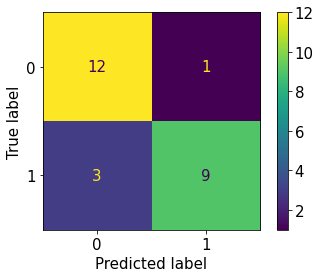

In [5]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)  

**ИЛИ**

In [6]:
# функция построения матрицы ошибок из документации sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12  1]
 [ 3  9]]


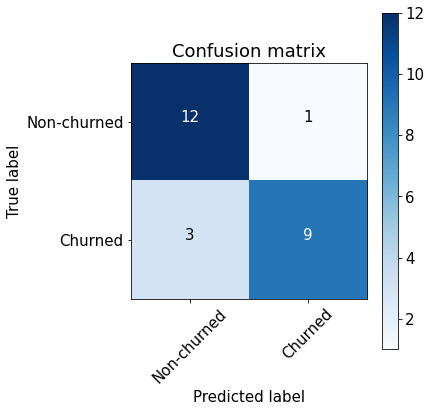

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import itertools

cnf_matrix = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(6, 6))
plot_confusion_matrix(cnf_matrix, 
                      classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("tmp/conf_matrix.png")
plt.show()

## Accuracy

**Accuracy** – широко используемая и легкая для понимания метрика. Это отношение всех правильных прогнозов к общему числу всех редсказанных
образцов.

В ряде задач **accuracy может являться неинформативной**, чаще всего в случае несбалансированных классов (imbalanced).

Например, предположим, что только 3% всех пациентов имеют некоторые заболевания. Создадим алгоритм, который будет помечать всех пациентов, как здоровых. В итоге он будет ошибочным только в 3 случаях из 100. Accuracy будет равно 0,97 или 97% и это высокая оценка, но
на самом деле алгоритм ничего не делает и абсолютно бесполезен.

$\large accuracy = \frac{TP + TN}{TP + TN+ FP + FN}$

[sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [8]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predicted)

0.84

## Точность (Precision)

**Точность (precision)** - это доля прогнозируемых положительных результатов, которые являются действительно верно-положительными результатами для всех положительно предсказанных объектов.

Другими словами, точность дает ответ на вопрос **"Из всех объектов, которые классифицированы как принадлежащие классу, сколько на самом
деле принадлежит ему?"**

$\large precision = \frac{TP}{TP + FP}$

[sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)

In [9]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predicted)

0.9

## Полнота (recall) / Чувствительность (sensitivity) / Оценка верно положительных (true positive rate, TPR) / Вероятность выявления (probability of detection)

**Полнота (recall)** – пропорция всех верно-положительно предсказанных объектов к общему количеству действительно положительных. То есть,
полнота показывает **сколько образцов из всех положительных примеров были классифицированы правильно**.

Чем **выше значение полноты**, тем **меньше положительных примеров пропущено** в классификации.

$\large recall = \frac{TP}{TP + FN}$

**Чувствительность (sensitivity) и полнота (recall) оценивают одно и то же**, различие в наименовании возникло из-за принадлежности этих терминов к разным областям науки. Так же встречаются названия **True positive rate** или **TPR (оценка верно положительных)** и **Probability of detection (вероятность выявления)**.

[sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)

In [10]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predicted)

0.75

## F-мера (F-score/F1)

**F-score** – взвешенное гармоническое среднее полноты и точности. Этот показатель демонстрирует, **как много случаев прогнозируется моделью
правильно, и сколько истинных экземпляров модель не пропустит**. F-мера **объединяет** в себе **информацию о полноте и точности** используемой модели.

$\large F_{1} = 2 \times \frac{precision \times recall}{precision + recall}$

[sklearn.metrics.f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)

In [11]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predicted)

0.8181818181818182

## Специфичность (Specificity)
Специфичность – отношение между верно классифицированных негативных экземпляров к числу всех негативных экземпляров.

$\large specificity = \frac{TN}{TN + FP}$

In [12]:
tn/(tn + fp)

0.9230769230769231

## AUC-ROC / ROC-кривая / Кривая ошибок

AUC = area under the curve (площадь под кривой).

Информативная и обобщающая метрикой - это площадь под кривой ошибок, что буквально означает площадь под **ROC-кривой
(Receiver Operating Characteristic, рабочая характеристика приёмника)**.

**ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника)** — график, позволяющий оценить качество **бинарной классификации**.

Чтобы получить данную кривую, необходимо вычислить две метрики, которые также получены из матрицы ошибок: уровень верно-положительных предсказанных экземпляров (True Positive Rate, TPR), что тождественно **полноте (recall)**, и **уровень ложно-положительных (False Positive Rate, FPR)**. В свою очередь, FPR - доля негативных объектов, которые по ошибке были классифицированы как положительные, ко всем фактическим негативным. Чем выше FPR, тем больше негативных экземпляров классифицируются не верно.

Доля TNR также называется специфичностью (англ. specificity). Следовательно, ROC-кривая изображает чувствительность (англ. seпsitivity), т.е. полноту, в сравнении с разностью 1 - specificity.

$\large FPR = \frac{FP}{FP + TN}$

Для объединения FPR и TPR в одну метрику, необходимо вычислить эти метрики, а затем построить их на одном графике с осями FPR и TPR. 

**Результирующая кривая представляет собой кривую ROC, а площадь под кривой является метрикой AUC ROC.**

Количественную интерпретацию ROC даёт показатель **AUC (англ. area under ROC curve, площадь под ROC-кривой)** — площадь, ограниченная ROC-кривой и осью доли ложных положительных классификаций. **Чем выше показатель AUC, тем качественнее классификатор**, при этом значение `0.5` демонстрирует непригодность выбранного метода классификации (соответствует случайному гаданию). Значение менее `0.5` говорит, что классификатор действует с точностью до наоборот: если положительные назвать отрицательными и наоборот, классификатор будет работать лучше.

[sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score)

[sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

[sklearn.metrics.plot_roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html#sklearn.metrics.plot_roc_curve)

<img src="images/auc_roc_worse_better.png" height=450 width=450>

<img src="images/auc_roc.png" height=400 width=400>

In [13]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predicted)

0.8365384615384616

In [14]:
from sklearn.metrics import roc_curve

roc_curve(y_test, y_predicted)

(array([0.        , 0.07692308, 1.        ]),
 array([0.  , 0.75, 1.  ]),
 array([2, 1, 0]))

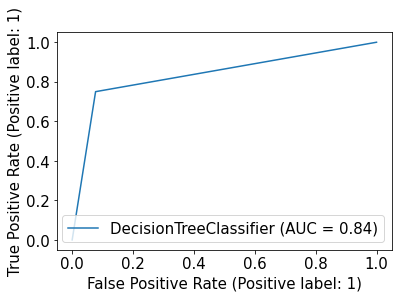

In [15]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)

<img src="images/auc_roc.jpg" height=650 width=650>

<img src="images/ROC in one picture.png">

<img src="images/roc_best.png" height=300 width=300>
<img src="images/roc_good.png" height=300 width=300>
<img src="images/roc_stupid.png" height=300 width=300>
<img src="images/roc_worst.png" height=300 width=300>

## AUC-PR (Precision-Recall)

AUC = area under the curve (площадь под кривой).

Как следует из названия, эта кривая строится в координатах полнота (R = recall) и точность (P = precision).

Чувствительность к соотношению классов.
 
Площадь под ней часто используют в качестве метрики качества алгоритма.

Площадь под PR-кривой (AUC PR) **рекомендуют использовать как раз в задачах с дисбалансом классов**, аргументируя это тем, что эта кривая точнее описывает правильность классификации объектов с большими оценками, тогда как ROC-кривая — различие распределений объектов разных классов по оценкам. 

Важно помнить, что при изменении баланса классов значение AUC_PR меняется, например, если случайную половину одного из классов удалить из выборки (AUC_ROC при этом практически не меняется)
 
[sklearn.metrics.precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html#sklearn.metrics.precision_recall_curve)

[sklearn.metrics.plot_precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html#sklearn.metrics.plot_precision_recall_curve)

<img src="images/pr in one picture.png" height=400 width=400>

In [16]:
from sklearn.metrics import precision_recall_curve

precision_recall_curve(y_test, y_predicted)

(array([0.48, 0.9 , 1.  ]), array([1.  , 0.75, 0.  ]), array([0, 1]))

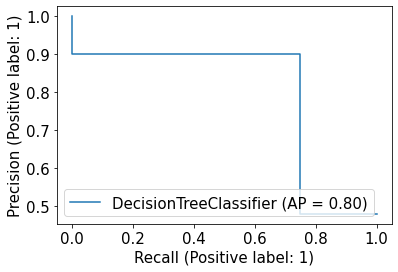

In [17]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(clf, X_test, y_test)

## Логистическая функция потерь (Logistic Loss)
